# First efforts to create similarity and difference scores for each row of the DS_resousces doc

## Import all the things

### based on this blog 

https://towardsdatascience.com/calculating-document-similarities-using-bert-and-other-models-b2c1a29c9630

In [36]:
import os                         # os is a module for navigating your machine (e.g., file directories).
import nltk                       # nltk stands for natural language tool kit and is useful for text-mining. 
import pandas as pd               # pandas is an easy way to import .csv files with headers and unique identifiers
import statistics
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

stop_words_l=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mzyssjkc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Check the files to access/use

In [37]:
# List all of the files in the "data" folder that is provided to you

for file in os.listdir("./data/similarity"):
   print("A file we can use is... ", file)
print("")

A file we can use is...  dif.csv
A file we can use is...  dif_2.csv
A file we can use is...  full_ds.csv
A file we can use is...  sim.csv
A file we can use is...  simple.dnd
A file we can use is...  sim_2.csv



## Read in, check and preprocess the file

In [70]:
DS_resources= pd.read_csv('./data/similarity/full_ds.csv')   # read in DS_resources as a data frame
type(DS_resources)                                           # check the file type

pandas.core.frame.DataFrame

In [71]:
cols = DS_resources.columns.values.tolist()                  # get the names of the colums and save as 'cols'
print(cols)

['Training type', 'Source', 'Resource', 'Link', 'Research Phase', 'Broad skill', 'Skill bite', 'Red skill', 'Tool', 'Status', 'Notes']


In [73]:
type(DS_resources)

pandas.core.frame.DataFrame

In [65]:
print(DS_resources[:10])

  Training type   Source                         Resource  \
0        Census  Website                About UK censuses   
1        Census  Website      Census aggregate data guide   
2        Census  Website  Obtaining census aggregate data   
3        Census  Website  Obtaining census aggregate data   
4        Census  Website  Obtaining census aggregate data   
5        Census  Website             Census boundary data   
6        Census  Website   Obtaining census boundary data   
7        Census  Website   Obtaining census boundary data   
8        Census  Website   Obtaining census boundary data   
9        Census  Website    Census flow data online guide   

                                               Link Research Phase  \
0  https://ukdataservice.ac.uk/learning-hub/census/   Explore data   
1  https://ukdataservice.ac.uk/learning-hub/census/   Explore data   
2  https://ukdataservice.ac.uk/learning-hub/census/       Get data   
3  https://ukdataservice.ac.uk/learning-hub/cens

In [78]:
DS_resources_lower = DS_resources.applymap(lambda s: s.lower() if type(s) == str else s)
DS_resources_cleaned = DS_resources_lower.applymap(lambda s: s if s not in stop_words_l else "")

# DS_resources = DS_resources[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
# DS_resources_cleaned = DS_resources.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )

print(DS_resources_cleaned[:10])

  Training type   Source                         Resource  \
0        census  website                about uk censuses   
1        census  website      census aggregate data guide   
2        census  website  obtaining census aggregate data   
3        census  website  obtaining census aggregate data   
4        census  website  obtaining census aggregate data   
5        census  website             census boundary data   
6        census  website   obtaining census boundary data   
7        census  website   obtaining census boundary data   
8        census  website   obtaining census boundary data   
9        census  website    census flow data online guide   

                                               Link Research Phase  \
0  https://ukdataservice.ac.uk/learning-hub/census/   explore data   
1  https://ukdataservice.ac.uk/learning-hub/census/   explore data   
2  https://ukdataservice.ac.uk/learning-hub/census/       get data   
3  https://ukdataservice.ac.uk/learning-hub/cens

In [79]:
type(DS_resources_cleaned)

pandas.core.frame.DataFrame

In [90]:
# remove special characters and stop words from the text of the combined column
DS_resources_2= DS_resources[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

print(DS_resources_2[:10])

0    Census_Website_About UK censuses_https://ukdat...
1    Census_Website_Census aggregate data guide_htt...
2    Census_Website_Obtaining census aggregate data...
3    Census_Website_Obtaining census aggregate data...
4    Census_Website_Obtaining census aggregate data...
5    Census_Website_Census boundary data_https://uk...
6    Census_Website_Obtaining census boundary data_...
7    Census_Website_Obtaining census boundary data_...
8    Census_Website_Obtaining census boundary data_...
9    Census_Website_Census flow data online guide_h...
dtype: object


In [94]:
tfidfvectoriser=TfidfVectorizer()
tfidfvectoriser.fit(DS_resources.cleaned)
tfidf_vectors=tfidfvectoriser.transform(DS_resources.cleaned)             # vectorise the cleaned/combined column

print(tfidf_vectors[:10])

AttributeError: 'Series' object has no attribute 'cleaned'

In [39]:
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T).toarray()   #create pairwise similarities between the vectors
pairwise_differences=euclidean_distances(tfidf_vectors)                 # and do the same for pairwise diffeences

print(pairwise_similarities[:10])
print(pairwise_differences[:10])

pd.DataFrame(pairwise_similarities).to_csv('./data/similarity/sim.csv')  #store them as .csv
pd.DataFrame(pairwise_differences).to_csv('./data/similarity/dif.csv')


[[1.         0.47906757 0.41434529 ... 0.05247145 0.08437533 0.1028736 ]
 [0.47906757 1.         0.6779553  ... 0.1288485  0.07887592 0.11170365]
 [0.41434529 0.6779553  1.         ... 0.04055664 0.10892632 0.12114045]
 ...
 [0.38302142 0.43098487 0.6627291  ... 0.04077619 0.10495296 0.12289116]
 [0.40994862 0.4539854  0.70941992 ... 0.04012629 0.10777049 0.11985501]
 [0.46795849 0.75154475 0.44821401 ... 0.12586063 0.07704687 0.10911336]]
[[0.         1.02071782 1.08227049 ... 1.37661073 1.35323661 1.33949722]
 [1.02071782 0.         0.80255181 ... 1.31996326 1.35729443 1.33288885]
 [1.08227049 0.80255181 0.         ... 1.38523886 1.33497092 1.32578999]
 ...
 [1.11083624 1.06678501 0.82130494 ... 1.38508037 1.33794398 1.32446883]
 [1.08632535 1.04500201 0.76233861 ... 1.3855495  1.33583645 1.3267592 ]
 [1.031544   0.70491879 1.05051034 ... 1.32222492 1.35864133 1.3348308 ]]


In [42]:
def most_similar(doc_id,similarity_matrix,matrix):                      #optional step to find the most similar
    print (f'Document: {DS_resources.iloc[doc_id]["cleaned"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {DS_resources.iloc[ix]["cleaned"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')        

Document: census website about uk censuses https   ukdataservice ac uk learning hub census  explore data understand key features census data basics nan nan nan nan


Similar Documents:


Document: census website census forms  https   ukdataservice ac uk learning hub census about uk censuses census definitions  explore data understand key features census data census documentation nan nan nan nan
Cosine Similarity : 0.7479006480410985


Document: census website census definitions  https   ukdataservice ac uk learning hub census about uk censuses census definitions  explore data understand key features census data census documentation nan nan nan nan
Cosine Similarity : 0.6823573338977049


Document: census video census      https   www youtube com watch v qqxtdsuwbju ab channel ukdataservice explore data understand key features census data  basics nan nan nan nan
Cosine Similarity : 0.5760401243308924


Document: census pdf uk data service introduction census  https   ukdataservice ac uk

Document: census pdf an overview      census design x   d  https   dam ukdataservice ac uk media        comptonblake pdf explore data understand key features census data census agencies nan nan nan nan
Euclidean Distance : 1.1050721752237458


Document: census microdata website obtaining      data https   ukdataservice ac uk learning hub census  understand data structure structure microdata files  nan nan nan nan nan
Euclidean Distance : 1.1073952343273143


Document: census pdf uk data service introduction census  https   ukdataservice ac uk  app uploads censuswebinar  nov     pdf explore data understand potential uses census data  nan nan nan nan nan
Euclidean Distance : 1.1084712406858936


Document: census video census      https   www youtube com watch v qqxtdsuwbju ab channel ukdataservice get data understand key features census data how find dataset nan nan nan nan
Euclidean Distance : 1.1090992730014206


Document: census video census      https   www youtube com watch v qqxtds

# Another option to create similarity and difference scores

## Import all the other things

In [44]:
!python -m pip install -U gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


  Using cached gensim-4.1.2-cp39-cp39-win_amd64.whl (24.0 MB)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mzyssjkc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(DS_resources.cleaned)]
print(tagged_data[:10])

[TaggedDocument(words=['census', 'website', 'about', 'uk', 'censuses', 'https', 'ukdataservice', 'ac', 'uk', 'learning', 'hub', 'census', 'explore', 'data', 'understand', 'key', 'features', 'census', 'data', 'basics', 'nan', 'nan', 'nan', 'nan'], tags=[0]), TaggedDocument(words=['census', 'website', 'census', 'aggregate', 'data', 'guide', 'https', 'ukdataservice', 'ac', 'uk', 'learning', 'hub', 'census', 'explore', 'data', 'awareness', 'different', 'types', 'census', 'data', 'aggregate', 'data', 'nan', 'nan', 'nan', 'nan'], tags=[1]), TaggedDocument(words=['census', 'website', 'obtaining', 'census', 'aggregate', 'data', 'https', 'ukdataservice', 'ac', 'uk', 'learning', 'hub', 'census', 'get', 'data', 'how', 'find', 'download', 'census', 'data', 'aggregate', 'data', 'tools', 'nan', 'infuse', 'nan', 'nan'], tags=[2]), TaggedDocument(words=['census', 'website', 'obtaining', 'census', 'aggregate', 'data', 'https', 'ukdataservice', 'ac', 'uk', 'learning', 'hub', 'census', 'get', 'data', 'ho

In [54]:
model_d2v = Doc2Vec(vector_size=1000,alpha=0.025, min_count=1)   # define how big we want the created vectors to be

In [55]:
model_d2v.build_vocab(tagged_data)                              # build the vocab for desired doc2vec model on the tagged_data

In [58]:
for epoch in range(1000):                                        # train the model using the vocab and tagged_data
    model_d2v.train(tagged_data, 
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)


In [57]:
document_embeddings=np.zeros((DS_resources.shape[0],1000)) 
for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.dv[i]


ValueError: could not broadcast input array from shape (1000,) into shape (100,)

In [53]:
pairwise_similarities_2=cosine_similarity(document_embeddings)
pairwise_differences_2=euclidean_distances(document_embeddings)

print(pairwise_similarities_2[:10])
print(pairwise_differences_2[:10])

pd.DataFrame(pairwise_similarities).to_csv('./data/similarity/sim_2.csv')  #store them as .csv
pd.DataFrame(pairwise_differences).to_csv('./data/similarity/dif_2.csv')

[[1.         0.45624427 0.33696218 ... 0.16362259 0.15220557 0.09738526]
 [0.45624427 1.         0.64419786 ... 0.35353045 0.10862369 0.25778706]
 [0.33696218 0.64419786 1.         ... 0.15703757 0.18583975 0.13707262]
 ...
 [0.28234633 0.34262968 0.58958767 ... 0.06226174 0.33163647 0.2133029 ]
 [0.30488523 0.33387469 0.5968226  ... 0.11303103 0.30997924 0.20618456]
 [0.48600715 0.65842567 0.36242455 ... 0.26096614 0.03094549 0.18502356]]
[[ 0.         11.00716967 11.66709185 ... 17.51164724 15.14942558
  14.47704001]
 [11.00716967  0.          9.04647793 ... 16.01688071 16.16535406
  13.77610081]
 [11.66709185  9.04647793  0.         ... 17.72446635 15.04130783
  14.37147239]
 ...
 [12.23016358 12.35546764  9.40528559 ... 18.66697516 13.74284223
  13.81245056]
 [11.75057708 12.18624805  9.11286901 ... 17.98262375 13.74457735
  13.60387986]
 [10.98049281  9.35656289 12.37618504 ... 17.20971442 17.14131677
  14.72541486]]
Document: census website about uk censuses https   ukdataservice

Document: rdm website disclosure assessment https   ukdataservice ac uk learning hub research data management data protection disclosure assessment  manage data disclosure control how assess disclosure risk nan nan nan nan
Cosine Similarity : 0.13874528636094186


Document: census microdata video accessing analysing census microdata using nesstar  https   www youtube com watch v  ibo glezua ab channel ukdataservice understand data structure understand different microdata file types topics available file nan nesstar nan nan
Cosine Similarity : 0.13856563026778584


Document: rdm website documenting consent https   ukdataservice ac uk learning hub research data management ethical issues consent for data sharing documenting consent  manage data introduction data ethics how document consent  nan nan nan nan
Cosine Similarity : 0.13799838907886283


Document: surveys pdf what weighting  https   ukdataservice ac uk  app uploads whatisweighting pdf explore data weighting types weights nan sps

Document: rdm website metadata https   ukdataservice ac uk learning hub research data management document your data metadata  prepare data create good quality data documentation introduction ddi nan nan nan nan
Euclidean Distance : 1.2626501987437149


Document: census boundary data pdf mapping      census microdata using r  https   ukdataservice ac uk app uploads mapping      census microdata using r pdf prepare data manipulate data analysis group data using dplyr nan r nan nan
Euclidean Distance : 1.2628092986240387


Document: census video accessing      census aggregate data  https   www youtube com watch v vsdgi pwt q ab channel ukdataservice get data downloading ukds data  how find dataset nan nan nan nan
Euclidean Distance : 1.2630741457702568


Document: rdm website quality https   ukdataservice ac uk learning hub research data management format your data quality  manage data create well organised data understand quality control measures nan nan nan nan
Euclidean Distance : 1.2

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

In [89]:
type(pairwise_similarities_2)

NameError: name 'pairwise_similarities_2' is not defined

# Create phylogenetic trees

## Once more, unto the import

In [98]:
pw_sim_1 = pd.read_csv('./data/similarity/sim.csv')
pw_sim_2 = pd.read_csv('./data/similarity/sim_2.csv')
pw_dif_1 = pd.read_csv('./data/similarity/dif.csv')
pw_dif_2 = pd.read_csv('./data/similarity/dif_2.csv')

In [8]:
!pip install biopython 
from Bio import Phylo                # https://biopython.org/wiki/Phylo

In [85]:
DS_array = DS_resources.to_numpy(dtype='str', na_value=np.nan)

print(DS_array[:10])

[['Census' 'Website' 'About UK censuses'
  'https://ukdataservice.ac.uk/learning-hub/census/' 'Explore data'
  'Understand key features of census data' 'Basics' 'nan' 'nan' 'nan'
  'nan']
 ['Census' 'Website' 'Census aggregate data guide'
  'https://ukdataservice.ac.uk/learning-hub/census/' 'Explore data'
  'Awareness of the different types of census data' 'Aggregate data'
  'nan' 'nan' 'nan' 'nan']
 ['Census' 'Website' 'Obtaining census aggregate data'
  'https://ukdataservice.ac.uk/learning-hub/census/' 'Get data'
  'How to find and download census data' 'Aggregate data tools' 'nan'
  'InFuse' 'nan' 'nan']
 ['Census' 'Website' 'Obtaining census aggregate data'
  'https://ukdataservice.ac.uk/learning-hub/census/' 'Get data'
  'How to find and download census data' 'Aggregate data tools' 'nan'
  'DKAN' 'nan' 'nan']
 ['Census' 'Website' 'Obtaining census aggregate data'
  'https://ukdataservice.ac.uk/learning-hub/census/' 'Get data'
  'How to find and download census data' 'Aggregate da

In [99]:
from Bio.Cluster import treecluster
tree = treecluster(pw_sim_1)

RuntimeError: data is not contiguous

In [101]:
tree = treecluster(pw_sim_1, distancematrix=distance)

NameError: name 'distance' is not defined

In [11]:
tree = Phylo.read("./data/similarity/simple.dnd", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')


In [12]:
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



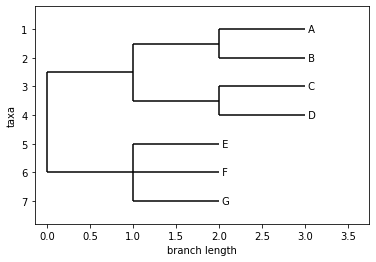

In [13]:
tree.rooted = True
Phylo.draw(tree)